## Unidad 6: Analisis y procesamiento de señales
Computación III - INSPT UTN 
Daiana Dominikow


Durante esta práctica vamos a introducir una herramienta de cálculo numérico que realiza operaciones matemáticas sobre datos guardados en un vector que asemejan una función.<br>
La diferencia es que en el caso de la derivada y la integral, conocíamos los operadores matemáticos que implementamos en un algoritmo, y en este caso la transformada de Fourier es una caja negra.<br>
La serie de Fourier es una serie que sirve para aproximar una función matemática periódica cualquiera, mediante una sumatoria de senos y cosenos.<br>
La sumatoria es infinita, por lo cual no podemos desarrollar la serie completa, pero mediante algunos términos podremos entender cómo funciona esta herramienta.<br>
Fourier lo planteó para la solución de la ecuación de difusión del calor (ley de Fourier) que en sus tiempos se podía resolver para fuentes senoidales, pero no para otro tipos de funciones más complejas. Al plantear expresiones más complejas, como sumatorias de funciones senoidales, podía generalizar las soluciones conocidas a casos que previamente no tenían solución.<br>

$
f(x) = \frac{a_0}{2} + \sum_{n=1}^{\infty} \left[ a_n \cos(nx) + b_n \sin(nx) \right]
$ <br>

$
a_0 = \frac{1}{\pi} \int_{0}^{2\pi} f(x)\,dx
$<br>

$
a_n = \frac{1}{\pi} \int_{0}^{2\pi} f(x)\cos(nx)\,dx
$<br>

$
b_n = \frac{1}{\pi} \int_{0}^{2\pi} f(x)\sin(nx)\,dx
$<br>


#### ¿Y qué nos importa Fourier?
Una señal de sonido, por ejemplo, o una perturbación en una cuerda de un instrumento puede que no sea una señal pura (armónico) si no qué esté formada por varios modos de vibración superpuestos.<br>

Por ejemplo, la función f(t) = t entre -π y π de manera periódica (o sea que T=2π) se denomina diente de sierra…calcular los coeficientes nos da:


$
a_n = \frac{1}{\pi} \int_{-\pi}^{\pi} f(t)\cos(nt)\,dt\, =\, 0 ,\, n >=0
$ <br>

$
b_n = \frac{1}{\pi} \int_{-\pi}^{\pi} f(t)\sin(nt)\,dt\, =\, -\frac{2}{n}\cos(n\pi) 
$ <br>

Por lo que la serie sería
$
f(t) = \sum_{n=1}^{N} -(2 \frac{\cos{n\pi}}{n}) \sin(\frac{2n\pi}{2\pi}t) = \sum_{n=1}^{N} -(2 \frac{\cos{n\pi}}{n}) \sin(nt)
$<br>

### Ejercicio 1
Graficar en Python la función y realizar un programa que vaya sumando armónicos. Graficar la función aproximada por la serie con N=100 armónicos.

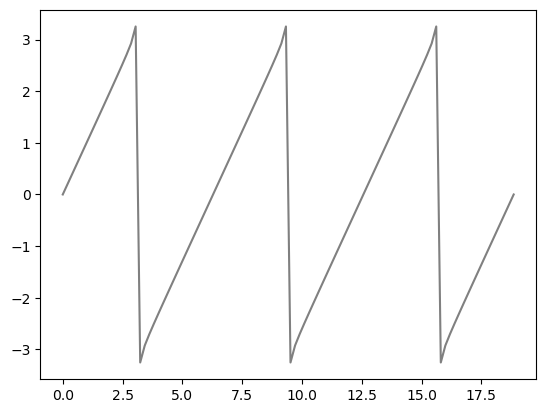

In [1]:
#armo un vector de por ejemplo  t de de 0 a 6 pi 
#y por ejemplo meto un loop con distintos n que vayan sumando sobre el mismo vector.

import numpy as np 
import matplotlib.pyplot as plt

N = 100

def fourier(n,t):
    return -(2* np.cos(n * np.pi)/ n )*np.sin(n*t)

# periodo
t = np.linspace(0, 6*np.pi, 100)

# armonicos
a = np.zeros(len(t)) 

for n in range(1,N):
    a += fourier(n,t)

plt.plot(t, a, color = 'gray')

## Procesamiento de señales!


### La transformada de Fourier es algo similar a la serie, pero no es necesario que la función sea periódica.

Tal cual Wikipedia:<br>
La transformada de Fourier devuelve  el espectro de frecuencias de una función durante un determinado tiempo. Un buen ejemplo de eso es lo que hace el oído humano, ya que recibe una onda auditiva y la transforma en una descomposición en distintas frecuencias (que es lo que finalmente se escucha). El oído humano va percibiendo distintas frecuencias a medida que pasa el tiempo, sin embargo, la transformada de Fourier contiene todas las frecuencias del tiempo durante el cual existió la señal; es decir, en la transformada de Fourier se obtiene un solo espectro de frecuencias para toda la función.

<img src="https://www.nti-audio.com/portals/0/pic/news/FFT-Time-Frequency-View-540.png" width="450" height="300">

La antitransformada de Fourier permite, teniendo el espectro, recuperar la función original. Esto es muy útil porque permite realizar operaciones sobre el espectro que serían más difíciles de realizar en el dominio del tiempo. En el dominio de la frecuencia se pueden aplicar filtros para recortar o “podar” (es el término técnico) toda una frecuencia del sonido.

<b>Aclaración: para nosotros la expresión para calcular la transformada y antitransformada será una caja negra, no ahondaremos en ella ya que no entra en el scope de la materia. Utilizaremos las herramientas que nos brinda nuestra biblioteca amiga Numpy :) </b>

Para nosotros, simples técnicos aprendiendo a programar, es importante que el resultado de la transformada de Fourier es una función compleja.

lo que nos interesa es utilizar la transformada de Fourier pero de un conjunto discreto de valores, digitalizado, que para nosotros es una señal. Esto nos lleva a la necesidad de entender el proceso de discretizar una señal que en principio podría ser continua. Una señal discretizada es una señal muestreada.

Perooo, no tenemos la función matemática si no un conjunto de valores que se corresponden con una señal (que levantamos en un vector numpy).
Una manera de crear esta señal, sería por ejemplo armar un vector t con una base de tiempo y una señal s (de señal) con los datos que sea función f(t). Para ser más claro:

Text(0.5, 1.0, 'Señal Senoidal de 3 Hz')

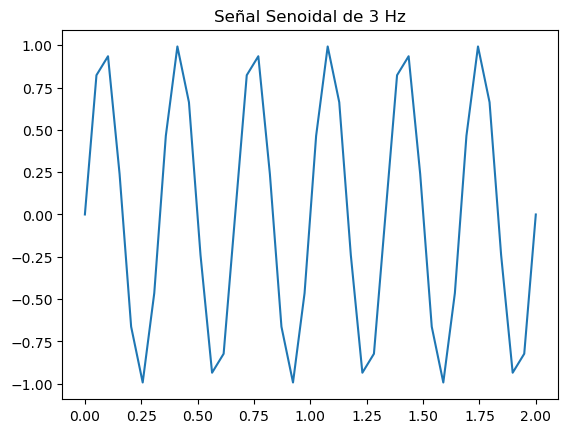

In [13]:
import numpy as np
import math 
import matplotlib.pyplot as plt

t = np.linspace(0, 2, 40)
w=2*math.pi*3
s=np.sin(w*t)
plt.plot(t,s)
plt.title('Señal Senoidal de 3 Hz')


De esta manera creamos una señal S que es una señal armónica de frecuenca 3Hz muestreada a 20 Hz (Es una señal digital que tiene 20 puntos por segundo).

## Teorema del muestreo 

¿Qué quiere decir muestreada? que la señal real por ser analógica tendría infinitos valores, pero nosotros no podemos representar infinitos valores en la pc, por lo que la frecuencia de muestreo establece cuántos valores de tensión, intensidad o lo que sea que represente la señal se tomarán por segundo. En este caso se muestreó a 20 Hz, lo que quiere decir que de la señal se toman 20 valores por segundo y se los guarda en el vector.

<img src = "https://refractionproductions.com/wp-content/uploads/2016/03/4-bit-linear-PCM.svg_.png">

<imf src="https://www.unimusica-peru.com/Sample-rate.jpg">

La frecuencia de muestreo debe cumplir con el teorema del Muestreo, o Nyquist-Shannon.<br>
Este teorema es muy específico y habla de que si una señal periódica analógica tiene una banda de frecuencias definida, entonces <b>muestreando con una frecuencia que es el doble de la frecuencia máxima de la señal se obtendrá una cantidad tal de puntos que permitirá recuperar la señal original, sin pérdida de información</b>. Esto quiere decir que la frecuencia de muestreo debe ser al menos 2 veces la frecuencia máxima que se encuentre en la señal a muestrear, y se considera aún cuando no se trabaje con señales periódicas. 

<img src = "https://musiki.org.ar/images/f/f5/Ondas15122322.png">

<img src="https://blog.multisononline.com/wp-content/uploads/2021/02/capu1.png">
<br>

Esto quiere decir que si la señal es, por ejemplo, sonido audible por los seres humanos (entre 20 Hz y 20 kHz), para poder representarla de manera que no se pierda información, se necesitarán al menos 40 kHz de frecuencia de muestreo. <br>
Esto significa <b>que el vector donde se guarde el sonido deberá tener al menos 40.000 valores numéricos por cada segundo de señal.</b> <br>
Esto no quiere decir que el sonido se escuchará perfecto en su versión digital, ya que el muestreo es solo un paso del proceso de digitalización y al considerar la cuantificación aparecen errores. <br>

### Ejercicio 2
Cargar en diferentes vectores una señal senoidal de 5 Hz y 3 segundos de duración con frecuencias de muestreo de 10 Hz (lo mínimo necesario según el teorema), 100 Hz y una frecuencia de muestreo menor 10 Hz. Graficarlos (en gráficos distintos) sacar conclusiones al respecto de los resultados.

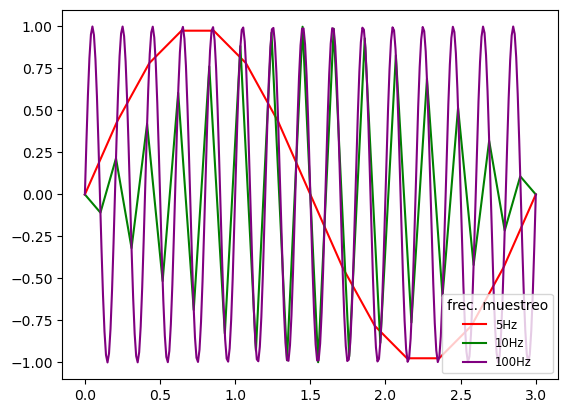

In [4]:

tiempo = 3
frec = 5 
def senial(tiempo,frec,frecmuestreo):
    t = np.linspace(0,tiempo,frecmuestreo * tiempo)
    w = 2 * np.pi * frec
    return t, np.sin(w*t)

frecmuestreo = 5
t, s =senial(tiempo,frec,frecmuestreo)
plt.plot(t,s, color = 'red', label = str(frecmuestreo) + 'Hz' )
frecmuestreo = 10
t, s =senial(tiempo,frec,frecmuestreo)
plt.plot(t,s, color = 'green',label = str(frecmuestreo) + 'Hz')
frecmuestreo = 100
t, s =senial(tiempo,frec,frecmuestreo)
plt.plot(t,s, color = 'purple',label = str(frecmuestreo) + 'Hz')

plt.legend(title = 'frec. muestreo', loc = 4, fontsize = 'small', fancybox = True)
plt.show()


## Pero antes de la transformada, viene la convolucion!!! 

Imaginate que tenemos nuestra señal en el dominio del tiempo  con bastante ruido, tenemos dos maneras de limpiarla, en el dominio del tiempo por <b>convolución</b> o podando directamente las frecuencias pasandola por <b>transformada de fourier</b>.<br>
Una convolución promedia los índices del vector en el dominio del tiempo con sus vecinos mas cercanos, de forma tal que puede 'suavizar' una señal o 'endurecerla' (hacerla mas ruidosa).<br>
Un filtro <b>pasa bajos</b> deja pasar frecuencias bajas (cambios leves en los picos que observamos en la señal) podando las frecuencias altas, elimina detalles que sobresalen de la señal quedandose con la tendencia general. Por el contrario, el filtro pasa altos lo que hace es resaltar estos picos de frecuencias altas, eliminando la tendencia general.


### Por ejemplo! 
El filtro aplicado va a hacer un promedio ponderado de 5 indices y va a recorrer cada uno de los del vector original para compararlo con sus vecinos

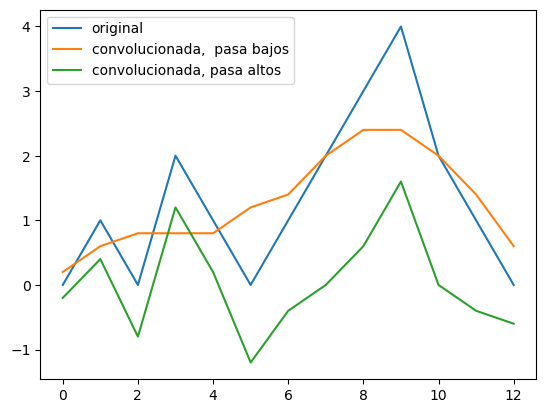

In [18]:
#supongamos la señal
x = np.array([0,1,0,2,1,0,1,2,3,4,2,1,0])
#pasa bajos
h = np.ones(5)/5 #cada indice va a valer 1/5
y = np.convolve(x,h,mode='same')
plt.plot(x, label = 'original')
plt.plot(y, label = 'convolucionada,  pasa bajos')
# y el filtro pasa altos es restar la señal original con la convolucionada
z = x - y
plt.plot(z, label ='convolucionada, pasa altos' )
plt.legend()
plt.show()

## Ahora si: Transformada discreta y transformada rápida de Fourier en Python.

Para calcular la transformada de Fourier en la computadora se utiliza una algoritmo denominado “Transformada Rápida de Fourier” que no es más que una implementación de la transformada Discreta de Fourier. Lo que hace es básicamente reemplazar las integrales por sumatorias, como hicimos nosotros cuando aprendimos a integrar por el método de trapecios. Este algoritmo se encuentra implementado en muchas bibliotecas de diferentes maneras. Nosotros vamos a utilizar el paquete de funciones que ofrece la biblioteca numpy, que trabaja sobre los vectores generados con esa biblioteca.

In [5]:
fs=np.fft.fft(s)

Como la señal es real y el algoritmo está preparado para realizar transformaciones sobre números complejos, el resultado que obtendremos será un vector de números complejos. <br>
Si teníamos N valores en la señal, obtendremos N/2 valores reales con información significativa y los siguientes N/2 valores contienen el complejo conjugado de los primeros N/2 valores. Es información redundante para nosotros y el uso que hacemos en esta materia.

Podemos igualmente realizar un “ploteo” del vector obtenido e intentar interpretarlo.

Vamos a ver que la escala de abajo en el plot no son las frecuencias y que no tenemos representado el espectro de frecuencias de la señal. Por eso hay que hacer una pequeña transformación lineal para obtener un vector con la escala posible de frecuencias de la señal, que se puede hacer manualmente o se puede delegar en los algoritmos ya existentes en la biblioteca “numpy.fft”. La línea siguiente llama a una función que recibe el tamaño del vector y el paso o distancia entre elementos en la base de tiempo y devuelve un vector con la base de frecuencias posibles.

In [6]:
paso = t[1]-t[0]
frec=np.fft.fftfreq(t.size, paso)

La operación que realiza la función es crear un vector de la misma cantidad de elementos que el vector tiempo pero donde el valor máximo de frecuencia posible sea la mitad de la frecuencia de muestreo.

Lo que haría sería evaluar cuál es la frecuencia del muestreo, para crear un vector de frecuencias con el paso correcto y el tamaño correcto. <br>
Por ejemplo, si la señal tiene 3 segundos y un paso de 0,1 s quiere decir que es un vector de 60 elementos con una frecuencia de 10 Hz. <br>
Esto quiere decir que por el teorema del muestreo la señal tiene frecuencia máxima de 5 Hz, por lo que hay que construir un vector que vaya de 0 Hz a 5 Hz, y este vector debe tener 30 elementos, por lo que el dF sería 0,167Hz.

Con esto, se puede graficar la transformada de Fourier en función de las frecuencias

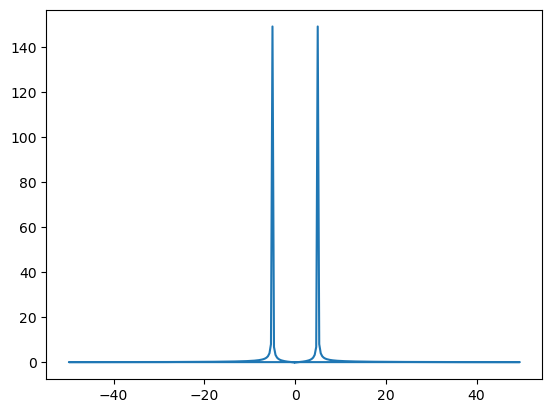

In [7]:
plt.plot(frec,np.abs(np.fft.fft(s))) #graficamos el valor absoluto (no nos interesa el complejo completo) Incluso podríamos ver solo la parte real.

Es importante notar que el vector que armamos con las frecuencias (El vector frec) contiene desde la frecuencia mínima (0) hasta la frecuencia máxima que podemos encontrar en la señal, que es la mitad de la frecuencia de muestreo. <br>
Esto es así porque el algoritmo considera el teorema del muestreo y sabe que en una señal con una frecuencia de muestreo de 500 Hz, por ejemplo, no puede reconocerse ni analizarse ninguna componente de más de 250 Hz.

Una opción para no tener una señal con su complejo conjugado e información redundante, es trabajar directamente con la transformada real, de esta manera

In [8]:
rffts=np.fft.rfft(s)

In [9]:
rfrec=np.fft.rfftfreq(t.size, d=paso)

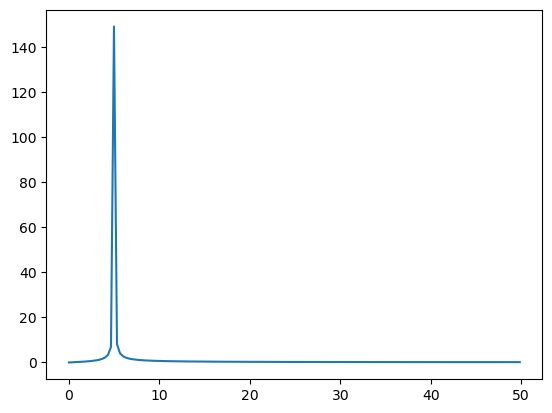

In [10]:
plt.plot(rfrec, np.abs(rffts))